In [1]:
# moving XGBoost prediction code to own notebook

In [2]:
# Generic inputs for most ML tasks
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn import tree
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.ensemble import BaggingRegressor
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor

import xgboost as xgb

pd.options.display.float_format = '{:,.2f}'.format

# setup interactive notebook mode
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from IPython.display import display, HTML

In [3]:
data_set = pd.read_csv("MultipleSources-2019-2025-Ascending.csv")
data_set.head()

,Date,SP500,Futures,Nikkei,FTSE,DAX
0,04/03/19,"2,873.40","2,879.75","21,713.21","7,418.28","11,954.40"
1,04/04/19,"2,879.39","2,882.75","21,724.95","7,401.94","11,988.01"
2,04/05/19,"2,892.74","2,896.00","21,807.50","7,446.87","12,009.75"
3,04/08/19,"2,895.77","2,898.25","21,761.65","7,451.89","11,963.40"
4,04/09/19,"2,878.20","2,882.50","21,802.59","7,425.57","11,850.57"


In [4]:
data_set.columns

data_set.tail()

# Step 1: Ensure the 'Date' column is in datetime format
data_set['Date'] = pd.to_datetime(data_set['Date'], format='%m/%d/%y')

data_set.tail()

# Step 2: Convert datetime to integer timestamp (in seconds)
data_set['Date'] = data_set['Date'].astype(np.int64) // 10**9

data_set.tail()




Index(['Date', 'SP500', 'Futures', 'Nikkei', 'FTSE', 'DAX'], dtype='object')

,Date,SP500,Futures,Nikkei,FTSE,DAX
1507,04/01/25,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
1508,04/02/25,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1509,04/03/25,"5,396.52","5,432.75","33,780.58","8,474.74","21,717.39"
1510,04/04/25,"5,074.08","5,110.25",NaN,"8,054.98","20,641.72"
1511,04/07/25,"5,062.25","5,149.75","32,640.00","7,702.08","19,789.62"


,Date,SP500,Futures,Nikkei,FTSE,DAX
1507,2025-04-01,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
1508,2025-04-02,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1509,2025-04-03,"5,396.52","5,432.75","33,780.58","8,474.74","21,717.39"
1510,2025-04-04,"5,074.08","5,110.25",NaN,"8,054.98","20,641.72"
1511,2025-04-07,"5,062.25","5,149.75","32,640.00","7,702.08","19,789.62"


,Date,SP500,Futures,Nikkei,FTSE,DAX
1507,1743465600,"5,633.07","5,674.50","35,624.48","8,634.80","22,539.98"
1508,1743552000,"5,670.97","5,512.00","35,725.87","8,608.48","22,390.84"
1509,1743638400,"5,396.52","5,432.75","33,780.58","8,474.74","21,717.39"
1510,1743724800,"5,074.08","5,110.25",NaN,"8,054.98","20,641.72"
1511,1743984000,"5,062.25","5,149.75","32,640.00","7,702.08","19,789.62"


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data_set.drop(columns = ['SP500']), data_set['SP500'], test_size=0.2, random_state=50)
X_train
X_test
y_train
y_test

,Date,Futures,Nikkei,FTSE,DAX
1351,1723680000,"5,567.50","36,726.64","8,347.35","18,183.24"
1047,1685491200,"4,190.50","30,887.88","7,446.14","15,664.02"
1109,1693267200,"4,506.75","32,226.97","7,464.99","15,930.88"
1238,1709596800,"5,085.75","40,097.63","7,646.16","17,698.40"
705,1642550400,"4,524.25","27,467.23","7,589.66","15,809.72"
...,...,...,...,...,...
70,1563148800,"3,017.25",NaN,"7,531.72","12,387.34"
132,1570665600,"2,941.00","21,551.98","7,186.36","12,164.20"
1313,1718928000,"5,471.89","38,596.47","8,237.72","18,163.52"
109,1567987200,"2,978.25","21,318.42","7,235.81","12,226.10"


,Date,Futures,Nikkei,FTSE,DAX
1253,1711411200,"5,265.25","40,398.03","7,930.96","18,384.35"
1445,1735516800,"5,958.75","39,894.54","8,121.01","19,909.14"
442,1609718400,"3,692.25","27,258.38","6,571.88","13,726.74"
404,1604620800,"3,500.75","24,325.23","5,910.02","12,480.02"
1224,1707782400,"4,971.25","37,963.97","7,512.28","16,880.83"
...,...,...,...,...,...
345,1597363200,"3,361.50","23,289.36","6,090.04","12,901.34"
275,1588723200,"2,833.50",NaN,"5,853.76","10,606.20"
1310,1718582400,"5,478.50","38,102.44","8,142.15","18,068.21"
1478,1739923200,"6,163.00","39,164.61","8,712.53","22,433.63"


1351   5,543.22
1047   4,179.83
1109   4,497.63
1238   5,078.65
705    4,532.76
         ...   
70     3,014.30
132    2,938.13
1313   5,464.62
109    2,978.43
1504   5,693.31
Name: SP500, Length: 1209, dtype: float64

1253   5,203.58
1445   5,906.94
442    3,700.65
404    3,509.44
1224   4,953.17
         ...   
345    3,372.85
275    2,848.42
1310   5,473.23
1478   6,144.15
1471   6,025.99
Name: SP500, Length: 303, dtype: float64

In [6]:
# XGBoost comes with its own class for storing datasets called DMatrix. 
# It is a highly optimized class for memory and speed. 
# That's why converting datasets into this format is a requirement for the native XGBoost API:


# Create regression matrices

dtrain_reg = xgb.DMatrix(X_train, y_train, )#enable_categorical=True)

dtest_reg = xgb.DMatrix(X_test, y_test, )#enable_categorical=True)

params = {"objective": "reg:squarederror", "tree_method": "exact", "max_depth" : 4, "learning_rate" : 0.1} # use "tree_method" : "hist" if you need speed

In [7]:
n = 100

model = xgb.train(

   params=params,

   dtrain=dtrain_reg,

   num_boost_round=n,

)

In [8]:
from sklearn.metrics import mean_squared_error
preds = model.predict(dtest_reg)


In [9]:
test_output = pd.DataFrame(preds, index = X_test.index, columns = ['pred_spx'])
test_output = test_output.merge(y_test, left_index = True, right_index = True)
test_output.head()
mean_absolute_error = abs(test_output['pred_spx'] - test_output['SP500']).mean()
print('Mean absolute error is ')
print(mean_absolute_error)
xg = abs(test_output['pred_spx'] - test_output['SP500']).mean()/test_output['SP500'].mean()
print(xg)

XGBmodel = model # for later use

,pred_spx,SP500
1253,"5,207.44","5,203.58"
1445,"5,919.72","5,906.94"
442,"3,687.88","3,700.65"
404,"3,506.62","3,509.44"
1224,"4,971.44","4,953.17"


Mean absolute error is 
8.008834989944315
0.0019322376243976873


1 day in seconds: 86400.0
lastdate: 1743984000.0
newdate 1744070400.0
lastdate: 1744070400.0
newdate 1744156800.0
lastdate: 1744156800.0
newdate 1744243200.0
lastdate: 1744243200.0
newdate 1744329600.0
lastdate: 1744329600.0
newdate 1744416000.0
lastdate: 1744416000.0
newdate 1744502400.0
lastdate: 1744502400.0
newdate 1744588800.0
Prediction Dates: [Timestamp('2025-04-08 00:00:00'), Timestamp('2025-04-09 00:00:00'), Timestamp('2025-04-10 00:00:00'), Timestamp('2025-04-11 00:00:00'), Timestamp('2025-04-12 00:00:00'), Timestamp('2025-04-13 00:00:00'), Timestamp('2025-04-14 00:00:00')]
Predictions: [np.float32(5067.3906), np.float32(5067.597), np.float32(5069.18), np.float32(5074.038), np.float32(5047.374), np.float32(5033.9863), np.float32(5031.844)]


<Figure size 1000x500 with 0 Axes>

Text(0.5, 1.0, 'Predicted S&P 500 Closing Prices for Next 7 Days')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Predicted Close Price')

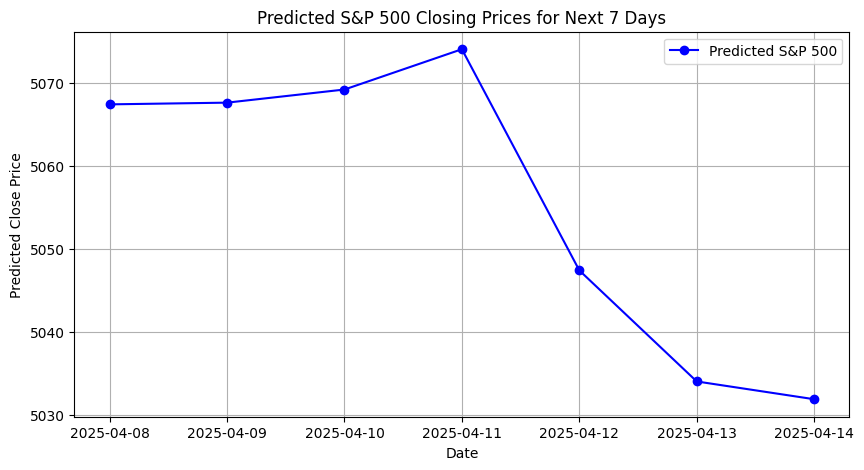

2025-04-08 00:00:00: $5067.39
2025-04-09 00:00:00: $5067.60
2025-04-10 00:00:00: $5069.18
2025-04-11 00:00:00: $5074.04
2025-04-12 00:00:00: $5047.37
2025-04-13 00:00:00: $5033.99
2025-04-14 00:00:00: $5031.84


In [10]:

# Feed last N rows into model, get predictions and use those values
# as input for future predictions
# using last 10 rows here
last_known = data_set.iloc[-10:].copy()
predictions = []
prediction_dates = []

# time is in SECONDS
single_day = pd.Timedelta('1day')
#print(f"1 day datetime: {single_day}")

#day_in_seconds = 86400
single_day = single_day.total_seconds()
print(f"1 day in seconds: {single_day}")

#lastdate = data_set.iloc[-1]['Date']
#print(f"last date: {lastdate}")

#print(f"next date: {single_day + lastdate}")


def downtrend(x, step=0.002, noise_scale=0.001):
    # take input index closing price and simulate a downward trend
    # with some variability. Use in predicting so features are changing
    trend = x * (1 - step)
    noise = x * np.random.normal(0, noise_scale)
    return trend + noise


# predicting 7 days ahead
for i in range(7):
    # take current last day
    prev_row = last_known.iloc[-1]

    input_df = pd.DataFrame([{
        'Date' : prev_row['Date'],
        #'SP500': prev_row['SP500'],
        'Futures': prev_row['Futures'],
        'Nikkei': prev_row['Nikkei'],
        'FTSE': prev_row['FTSE'],
        'DAX': prev_row['DAX']
    }])

    
    # create DMatrix for XGBoost 
    dmatrix_input = xgb.DMatrix(input_df)    
    pred = XGBmodel.predict(dmatrix_input)[0]
    predictions.append(pred)

    # get last date, currently in int64 ns since unix epoch
    # because that's what XGB will accept
    lastdate = prev_row['Date']
    print(f"lastdate: {lastdate}")
    # increase by 1 day
    new_date =  lastdate + single_day
    print(f"newdate {new_date}")
    prediction_dates.append(new_date)


    
    
    # Simulate new feature values
    new_row = pd.DataFrame({
        'Date' : new_date,
        #'SP500': [pred], 
        # add variability to other features by simulating changes
        # otherwise we'll just get the same predicted SP500 price again
        # using downtrend function
        'Futures': downtrend(prev_row['Futures']), 
        'Nikkei': downtrend(prev_row['Nikkei']), 
        'FTSE': downtrend(prev_row['FTSE']), 
        'DAX': downtrend(prev_row['DAX'])
    },index=[new_date])

    # Append the new prediction to last_known for the next iteration
    last_known = pd.concat([last_known, new_row])


# get readable dates back
#data_set['Date'] = pd.to_datetime(data_set['Date'], unit="s")
prediction_readable = []
for date in prediction_dates:
    prediction_readable.append(pd.to_datetime(date, unit="s"))
# data_set.set_index('Date', inplace=True)
#data_set.tail()

print(f"Prediction Dates: {prediction_readable}")
print(f"Predictions: {predictions}")

# Plot only the predicted S&P 500 prices
plt.figure(figsize=(10, 5))
plt.plot(prediction_readable, predictions, marker='o', linestyle='-', color='blue', label='Predicted S&P 500')
plt.title('Predicted S&P 500 Closing Prices for Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.grid(True)
plt.legend()
plt.show()

# Output predictions
for date, price in zip(prediction_readable, predictions):
    print(f"{date}: ${price:.2f}")
